True


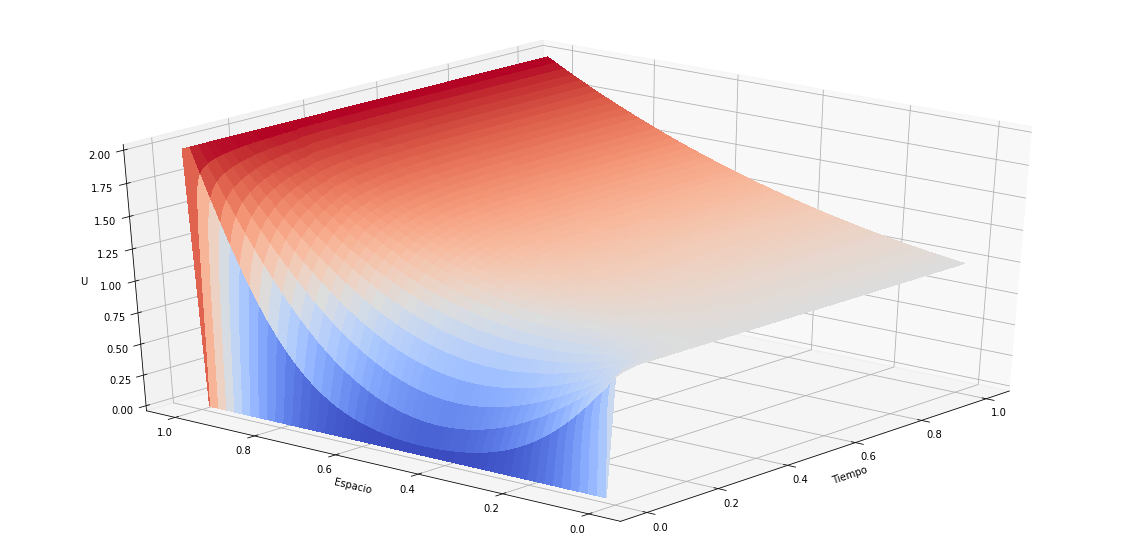

In [27]:
#PROBLEMA 1
#Se nos pide resolver numéricamente la ecuación de reacción-difusión para el caso de condiciones de frontera tipo Dirichlet por el método de BTCS, con condición inicial u(x,0)=0, y condiciones a la frontera u(0,t)=1 y u(1,t)=2, para un tiempo t=0,..,1
#COMENZAMOS CON LA ADAPTACION DEL CODIGO DE Dr. Vivi Andasari de la Universidad de Boston.

import numpy as np
from scipy import sparse
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm


M = 50 # GRID POINTS on space interval
N = 300 # GRID POINTS on time interval

x0 = 0
L = 1

# ----- Spatial discretization step -----
dx = (L - x0)/(M - 1)

t0 = 0
tF = 1

# ----- Time step -----
dt = (tF - t0)/(N - 1)

D = 1  # Diffusion coefficient
alpha = -1 # Reaction rate

r = dt*D/dx**2
s = dt*alpha;

xspan = np.linspace(x0, L, M)
tspan = np.linspace(t0, tF, N)

main_diag = (1 + 2*r - s)*np.ones((1,M-2))
off_diag = -r*np.ones((1, M-3))

a = main_diag.shape[1]

diagonals = [main_diag, off_diag, off_diag]

A = sparse.diags(diagonals, [0,-1,1], shape=(a,a)).toarray()

# ----- Initializes matrix U -----
U = np.zeros((M, N))

#----- Initial condition -----
U[:,0] =0

#----- Dirichlet boundary conditions -----
U[0,:] = 1
U[-1,:] = 2

for k in range(1, N):
    c = np.zeros((M-4,1)).ravel()
    b1 = np.asarray([r*U[0,k], r*U[-1,k]])
    b1 = np.insert(b1, 1, c)
    b2 = np.array(U[1:M-1, k-1])
    b = b1 + b2  # Right hand side
    U[1:M-1, k] = np.linalg.solve(A,b)  # Solve x=A\b

# ----- Checks if the solution is correct:
g = np.allclose(np.dot(A,U[1:M-1,N-1]), b)
print(g)

# ----- Surface plot -----
X, T = np.meshgrid(tspan, xspan)

fig = plt.figure(figsize=(20,10))
ax = fig.gca(projection='3d')

surf = ax.plot_surface(X, T, U, linewidth=0,
                       cmap=cm.coolwarm, antialiased=False)



aax.set_xlabel('Tiempo')
ax.set_ylabel('Espacio')
ax.set_zlabel("Concentración")
ax.view_init(elev=30, azim=220)
plt.tight_layout()
plt.show()

Para resolver este problema se tomo como base el codigo para resolver la ecuaccion de reaccion-difusion en 1D tomado de una lectura de la universidad de Boston, se modificaron las condiciones inciales, la condiciones en la frontera, parametros de difusion y reaccion y el tiempo a integrar.
Podemos observar en los resultados que la concentracion aproximadamente en la mitad del tubo al iniciar la solucion es casi nula y al comenzar el tiempo esta va aumentando de mayor manera en las partes centrales del tubo, al pasar un segundo vemos como la concentracion a lo largo del tubo varia aproximadametne de manera lineal con respecto al espacio entre las fronteras.  




Problema 2:

Ahora supondremos que se colocan reguladores de presión, que permiten flujo de los gases desde los reservorios hacia el tubo inicialmente vacío $u(x,0) = 0$. En $x=0$, el flujo de gas es $\partial u/\partial x (0,t) = 0.1$ y en $x=1$ el flujo $\partial u/\partial x (1,t) = 0.2$.

Se pide realizar una simulación numérica de este escenario para $=0,..,10$.

True


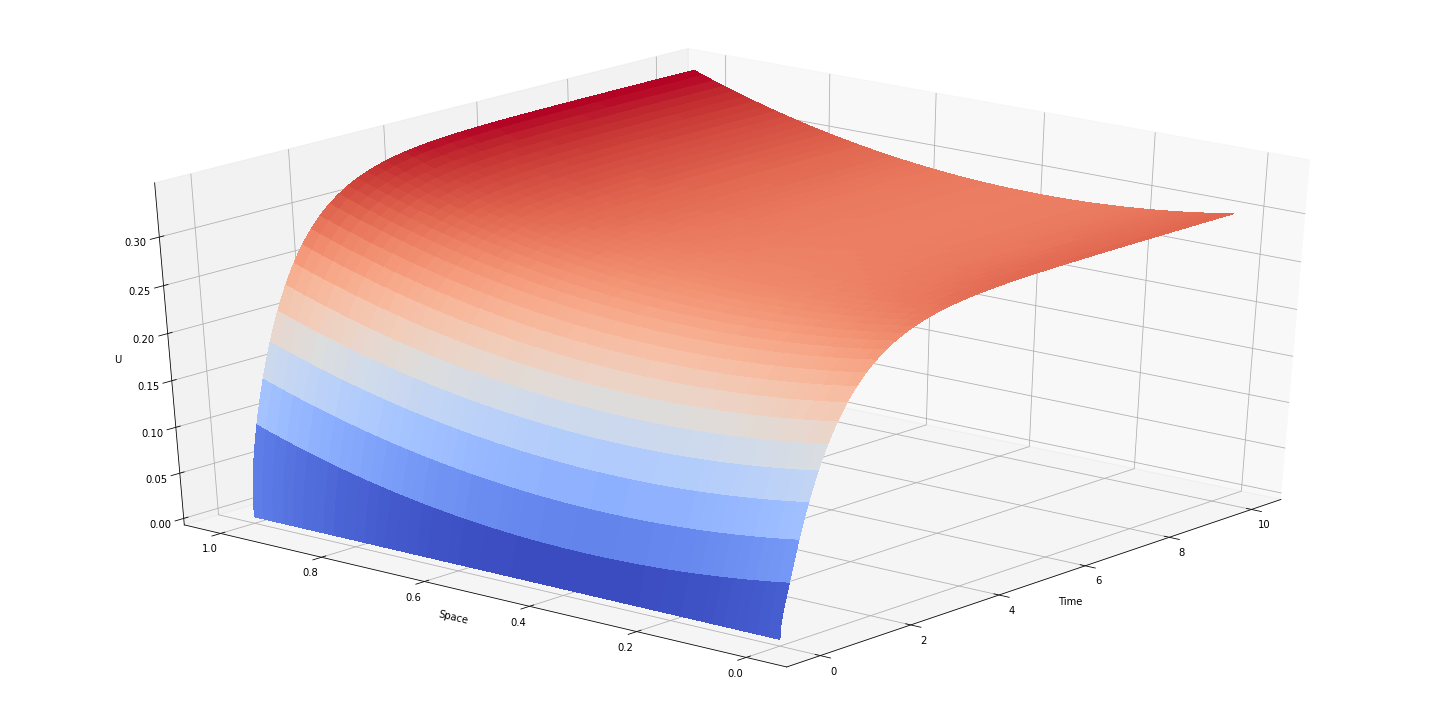

In [40]:
import numpy as np
from scipy import sparse
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm


M = 500 # GRID POINTS on space interval
N = 600 # GRID POINTS on time interval

x0 = 0
xL = 1

# ----- Spatial discretization step -----
dx = (xL - x0)/(M - 1)

t0 = 0
tF = 10

# ----- Time step -----
dt = (tF - t0)/(N - 1)

D = 1  # Diffusion coefficient
alpha = -1 # Reaction rate

r = dt*D/dx**2
s = dt*alpha
a = 1 + 2*r - s


xspan = np.linspace(x0, xL, M)
tspan = np.linspace(t0, tF, N)

main_diag = (1 + 2*r - s)*np.ones((1,M))
off_diag = -r*np.ones((1, M-1))

a = main_diag.shape[1]

diagonals = [main_diag, off_diag, off_diag]

A = sparse.diags(diagonals, [0,-1,1], shape=(a,a)).toarray()
A[0,1] = -2*r
A[M-1,M-2] = -2*r

# ----- Initializes matrix U -----
U = np.zeros((M, N))

#----- Initial condition -----
U[:,0] = 0

#----- Neumann boundary conditions -----
leftBC = np.arange(1, N+1)
f = 0.1

rightBC = np.arange(1, N+1)
g = 0.2


for k in range(1, N):
    c = np.zeros((M-2,1)).ravel()
    b1 = np.asarray([2*r*dx*f, 2*r*dx*g])
    b1 = np.insert(b1, 1, c)
    b2 = np.array(U[0:M, k-1])
    b = b1 + b2  # Right hand side
    U[0:M, k] = np.linalg.solve(A,b)  # Solve x=A\b

# ----- Checks if the solution is correct:
gc = np.allclose(np.dot(A,U[0:M,N-1]), b)
print(gc)

# ----- Surface plot -----
X, T = np.meshgrid(tspan, xspan)

fig = plt.figure(figsize=(20,10))
ax = fig.gca(projection='3d')

surf = ax.plot_surface(X, T, U, linewidth=0,
                       cmap=cm.coolwarm, antialiased=False)

ax.set_xlabel('Tiempo')
ax.set_ylabel('Espacio')
ax.set_zlabel("Concentración")
ax.view_init(elev=30, azim=220)
plt.tight_layout()
plt.show()

Para resolver este problema usamos el tipo de frontera de Neuman, tomando el codigo base del Dr. Vivi Andasari, se modifico el tiempo de integracion, las condiciones iniciales, las condiciones de la frontera y los parametros de difusion y reaccion, la simulacion que obtenemos nos muestra como la concentracion empieza en 0 durante todo el tubo, y conforme pasa el tiempo esta comienza a subir a lo largo del tubo, se logra observar como en las fronteras aumenta mas rapido la concentracion, pero se observa como tla concentracion tiende a una variacion lineal con resepcto al espacio entre las 2 fronteras.


Problema 3:

¿Que pasaría en el caso de que se mezclaran dos gases que no reaccionan entre si, como sería mezclar dos recipientes con el mismo tipo de gas (el coeficiente de reacción $\alpha=0$)?.

Suponga que inicialmente el tubo está vacío $u(x,0)=0$ y la concentración en $u(0,t)=1$ y $u(1,t)=2$.

Resuelva numéricamente este caso.

True


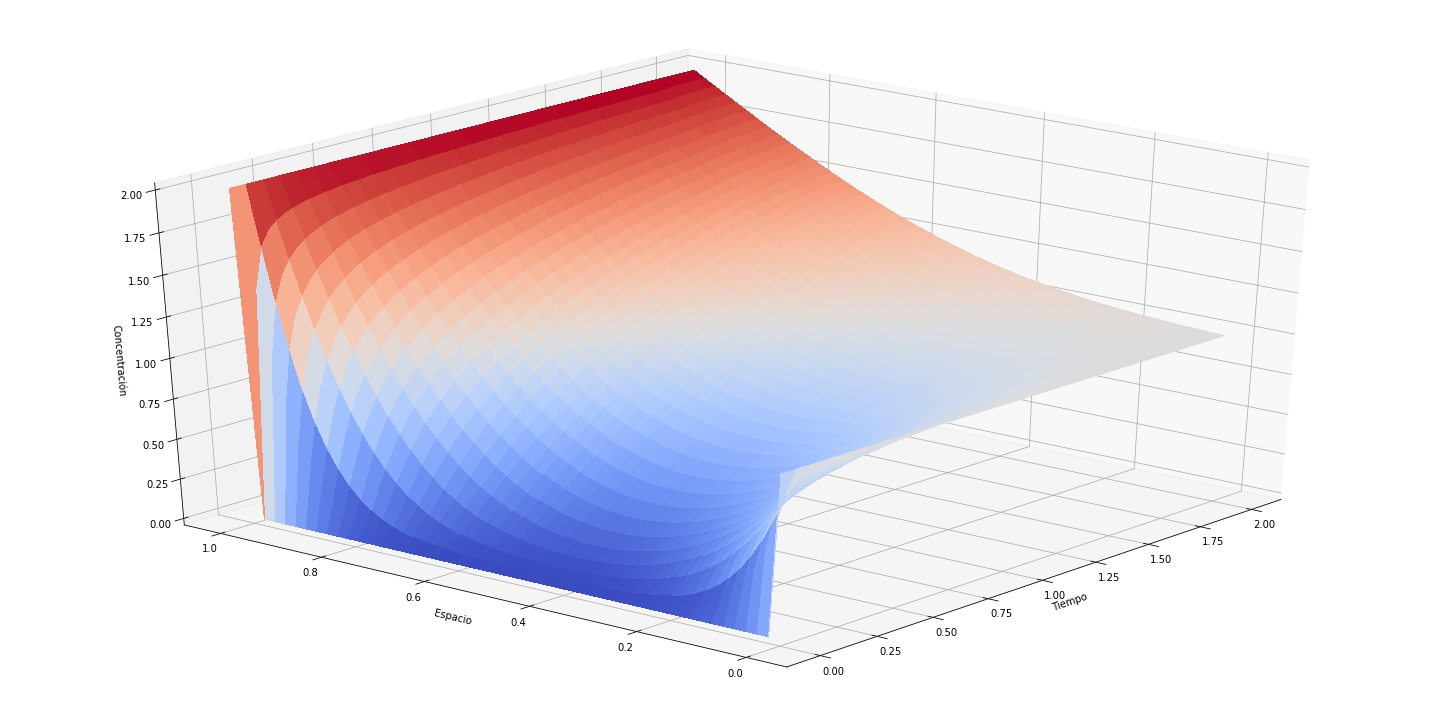

In [48]:
M = 50 # GRID POINTS on space interval
N = 60 # GRID POINTS on time interval

x0 = 0
xL = 1

# ----- Spatial discretization step -----
dx = (xL - x0)/(M - 1)

t0 = 0
tF = 2

# ----- Time step -----
dt = (tF - t0)/(N - 1)

D = 0.1  # Diffusion coefficient
alpha = 0 # Reaction rate

r = dt*D/dx**2
s = dt*alpha;

xspan = np.linspace(x0, xL, M)
tspan = np.linspace(t0, tF, N)

main_diag = (1 + 2*r - s)*np.ones((1,M-2))
off_diag = -r*np.ones((1, M-3))

a = main_diag.shape[1]

diagonals = [main_diag, off_diag, off_diag]

A = sparse.diags(diagonals, [0,-1,1], shape=(a,a)).toarray()

# ----- Initializes matrix U -----
U = np.zeros((M, N))

#----- Initial condition -----
U[:,0] = 0

#----- Dirichlet boundary conditions -----
U[0,:] = 1.0 
U[-1,:] = 2.0

for k in range(1, N):
    c = np.zeros((M-4,1)).ravel()
    b1 = np.asarray([r*U[0,k], r*U[-1,k]])
    b1 = np.insert(b1, 1, c)
    b2 = np.array(U[1:M-1, k-1])
    b = b1 + b2  # Right hand side
    U[1:M-1, k] = np.linalg.solve(A,b)  # Solve x=A\b

# ----- Checks if the solution is correct:
g = np.allclose(np.dot(A,U[1:M-1,N-1]), b)
print(g)

# ----- Surface plot -----
X, T = np.meshgrid(tspan, xspan)

fig = plt.figure(figsize=(20,10))
ax = fig.gca(projection='3d')

surf = ax.plot_surface(X, T, U, linewidth=0,
                       cmap=cm.coolwarm, antialiased=False)



ax.set_xlabel('Tiempo')
ax.set_ylabel('Espacio')
ax.set_zlabel("Concentración")
ax.view_init(elev=30, azim=220)
plt.tight_layout()
plt.show()


Para este problema se utilizo el codigo que utiliza fronteras del tipo Dirichlet, se modificaron las condiciones iniciales, condiciones de frontera y el parametro de reaccion se hizo nulo, lo que observamos en la simulacion es que al hacer nulo el coeficiente de reaccion, la evolución de como aumenta la concentracion a lo largo del tubo es mas lenta, a comparacion que con el problema 1 donde teniamos $\alpha$=0.1, debido a esto vemos como aumenta relativamente poco la concentracion en las partes centrales del tubo, es por esto que se requiere mas tiempo para que la concentracion distribuya de manera lineal con respecto al espacio entre las fronteras a lo largo del tubo.

